## Student Number: 2938740

### Question 1a) Draw the state space diagram

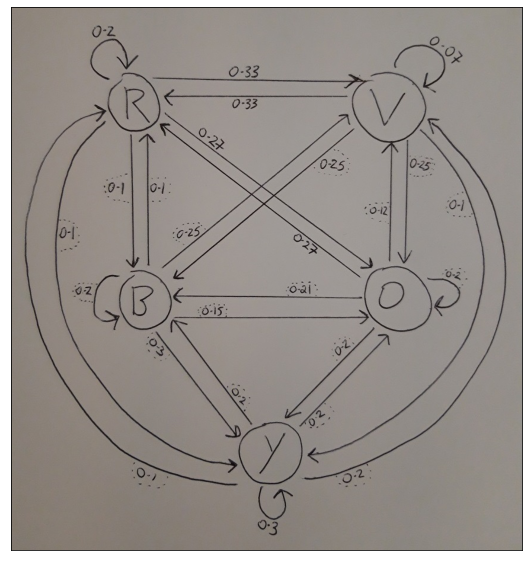

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpllimg
img=mpllimg.imread('State Diagram Small.jpg')
plt.figure(figsize=(10, 10))
plt.xticks([]), plt.yticks([])
plt.imshow(img)
plt.show()

<br>

### Question 1b) What are the 3 and 7 step transition matrices?

First create the transition matrix P from the state diagram and transition probabilities given:

In [1]:
# Import libraries
import numpy as np
from numpy import linalg as LA
# Order is Red, Violet, Blue, Orange, Yellow
P = np.array([[0.2, 0.33, 0.1, 0.27, 0.1],
              [0.33, 0.07, 0.25, 0.25, 0.1],
              [0.1, 0.25, 0.2, 0.15, 0.3],
              [0.27, 0.12, 0.21, 0.2, 0.2],
              [0.1, 0.2, 0.2, 0.2, 0.3]])


print(f"\nTransition Matrix P:\n\n{P}")


Transition Matrix P:

[[0.2  0.33 0.1  0.27 0.1 ]
 [0.33 0.07 0.25 0.25 0.1 ]
 [0.1  0.25 0.2  0.15 0.3 ]
 [0.27 0.12 0.21 0.2  0.2 ]
 [0.1  0.2  0.2  0.2  0.3 ]]


<br><br>Second, define the n-step transition probability. If we have a Markov Chain in state i at time m, we may wish to calculate the probability that it moves to state j at time n + m. In general terms we can define this as: $P_{ij} ^{n} = P (X_{n+m} | X_{m} = i)$ , and define the matrix P (the n-step transition matrix) as:  $P^{n}$ = { $p_{ij} ^{(n)}$ }<br>
If the process has a stationary transition probability then the equation holds for any n. It also holds for m = 0.<br><br>
What this tells us is that moving from state i to state j can be thought of as moving from state i to k, and then from state k to j as time moves through n + m. This can be given as: $P^{(2)} = p_{ij} ^{(2)} = \sum\limits_{k} P_{ik} P_{kj}$<br><br>Following to the next step:  $P^{(3)} = P P^{(2)} = p_{ij} ^{(3)} = \sum\limits_{k} P_{ik} P_{kj}^{(2)}$<br><br>
This leads to the general tern $P^{(n)} = P P^{(n-1)} = p_{ij} ^{(n)} = \sum\limits_{k} P_{ik} P_{kj}^{(n-1)}$<br><br>
The n-step transition probabilities for a Markov chain which is stationary is thus defined as: $P_{ij} ^{(n)} = P(X_{n} = j | X_{0} = i) = \sum\limits_{k} P_{ik} P_{kj}^{(n-1)}$<br><br>This gives the n-step Matrix equation: $P^{(m+n)} = P^{(m)} P^{(n)}$<br><br>It also stands that $P^{(n)} = (P)^{n}$ - This is an important corollary of the C-K equation.<br><br>
If we then set m = 0 we can see that<br>
$P^{(1)} = P$<br>
$P^{(2)} = P P = P^{(3)}$<br>
$P^{(3)} = P^{(2)} P = P^{(3)}$<br>
etc..

Thus calculating the 3 and 7 step transition matrix is equivalent to calculating $P^{(3)}$ and $P^{(7)}$.  The linear algebra library within Python makes this an easy task.<br>
<div class="alert alert-block alert-info">
<b>Note:</b> Rounding levels will be changed as and when required for rounding for code and result analysis reasons.</div>

In [2]:
# Set rounding
np.set_printoptions(precision=4)

p3 = LA.matrix_power(P, 3)
print(f"The 3 step transition matrix of P is given as: \n{p3}")

p7 = LA.matrix_power(P, 7)
print(f"\n\nThe 7 step transition matrix of P is given as: \n{p7}")

The 3 step transition matrix of P is given as: 
[[0.2008 0.2017 0.1864 0.2153 0.1958]
 [0.2076 0.187  0.1943 0.2161 0.195 ]
 [0.196  0.1953 0.1917 0.2122 0.2048]
 [0.2045 0.1886 0.194  0.2149 0.198 ]
 [0.1958 0.1947 0.1921 0.2123 0.2051]]


The 7 step transition matrix of P is given as: 
[[0.201  0.1935 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]]


<br>

### Question 1c) Find the distribution after 16 generations given an initial distribution

In order to calculate the distribution after 16 generations another version of the Chapman-Kolmogorov equation is required.

If $\pi^{n}$ is a vector of probabilities associated with a given initial state where: $\pi_{i} ^{(n)} = P(X_{n} = i)$<br>
and let $\pi^{(0)}$ represent the vector of probabilities when n=0, then: $\pi^{(n)} = \pi^{(0)} (P) ^{n}$<br><br>
The following Python code takes the initial state P0 and multiplies it by the matrix P raised to the power of 16, as per the previous C-K method of raising a Matrix to a power.  The resulting dot product is the distribution after 16 generations.

In [3]:
# Find distribution after 16 generations

# Initial distribution at p0
p0 = np.array([0.33, 0.24, 0.03, 0.24, 0.16])
# P after 16 generations, using P as created earlier
p16 = LA.matrix_power(P, 16)

# Distribution after 16 generations
p16 = np.dot(p0, p16)
print(f"The distribution of flowers after 16 generations is given as:\n\n(Red, Violet, Blue, Orange, Yellow):\n{p16}")

The distribution of flowers after 16 generations is given as:

(Red, Violet, Blue, Orange, Yellow):
[0.201  0.1934 0.1917 0.2142 0.1997]


<br>

### Question 1d) What colour distribution will I get in the long term?

To solve this efficiently in Python two methods will be combined.  The first is the Matrix method of raising a Matrix to a power by defining the formula: $T^{(n)} = P D^{(n)} P^{(-1)}$, where the matrices in the equation are defined as:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$T$ - This is our base matrix $P$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$P$ - The matrix of eigenvectors of $T$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$D$ - The diagonalised matrix of eigenvalues of $T$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$P^{(-1)}$ - The inverse of the matrix of eigenvectors of $T$<br><br>
The theory dictates that our 5x5 matrix $P$ is diagonalisable if there exists 5 linearly independent eigenvectors (u1, ..., u5) associated with the eigenvalues $\lambda1, ..., \lambda5$ as calculated from the generic formula $det(A - \lambda I)$.  If this is found to be true then $D$ will be a diagonal matrix with the 5 eigenvalues along its leading diagonal. This formula allows us to raise a matrix to a specific power, but what about raising to infinity as is required to determine the stationary distribution?<br><br>The second method will be to utilise the method of eigenvectors for solving such problems. We know from the C-K equation that $\pi^{(n)} = \pi^{(0)} P^{(n)}$ and from this: $\pi^{(n)} = \sum\limits_{k=1}^{N} c_{k}\lambda_{k}^{n}v_{k}$ where:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$c = constant$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$\lambda = eigenvalue$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$v = eigenvector$<br><br>
Traditionally we would need to solve this equation to find the values of $c$ however as we are using Python and the method of raising a Matrix to a power, we need only worry about 2 specific properties of this equation when dealing with the long-term limit:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;The largest eigenvalue = 1, which means ${\lambda_{k}^{n}\to 1}$ for ${n\to\infty}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;All other eigenvalues < 1, which means ${\lambda_{k}^{n}\to 0}$ for ${n\to\infty}$<br><br>
This allows us to re-define the diagonal matrix $D$ which contains our eigenvalues to be a matrix of zeroes except for the element (1, 1) which will contain the largest eigenvalue $\lambda_{1}$ = 1<br><br>Let's see how this plays out in Python.


In [4]:
# Find the eigenvalues and eigenvectors of our base matrix P
eigenvalues, eigenvectors = LA.eig(P)
print(f"The eigenvalues of P are:\n{eigenvalues}")
print(f"\nThe eigenvectors of P are:\n{eigenvectors}")
print("\nThere are 5 linearly indpendent eigenvalues and eigenvectors, as required\n")

The eigenvalues of P are:
[ 1.      0.2245 -0.2265  0.033  -0.0609]

The eigenvectors of P are:
[[ 0.4472  0.628  -0.6288 -0.1362  0.5974]
 [ 0.4472  0.311   0.5856  0.3238  0.0646]
 [ 0.4472 -0.4732 -0.2174  0.7235 -0.2795]
 [ 0.4472  0.049   0.4257 -0.426  -0.6737]
 [ 0.4472 -0.5316 -0.1821 -0.4143  0.3269]]

There are 5 linearly indpendent eigenvalues and eigenvectors, as required



In [5]:
# Do the eigenvectors diagonalise P using D = inv(eigenvectors) * P * eigenvectors?
D = LA.inv(eigenvectors) @ P @ eigenvectors
print(f"Formula results in some rounding errors (e-17) as seen in first row:\n{D[0]}")
# Remove values less than e-10
elim_near_zeros = abs(D) < 0.0000000001
D[elim_near_zeros] = 0
print(f"\nCleaned matrix shows that the Diagonal matrix D is valid.  Compare to original eigenvalue vector:\n{D}")
print(f"\nCalculated eigenvalues listed again for verification:\n{eigenvalues}")

Formula results in some rounding errors (e-17) as seen in first row:
[ 1.0000e+00 -5.5511e-17  2.9143e-16 -2.7756e-17 -8.3267e-17]

Cleaned matrix shows that the Diagonal matrix D is valid.  Compare to original eigenvalue vector:
[[ 1.      0.      0.      0.      0.    ]
 [ 0.      0.2245  0.      0.      0.    ]
 [ 0.      0.     -0.2265  0.      0.    ]
 [ 0.      0.      0.      0.033   0.    ]
 [ 0.      0.      0.      0.     -0.0609]]

Calculated eigenvalues listed again for verification:
[ 1.      0.2245 -0.2265  0.033  -0.0609]


In [6]:
# To calculate the stationary long-term distribution we will use the limit as n -> infinity
# Re-define D to only contain lambda 1
D_infinity = np.diag([1, 0, 0, 0, 0])
T_infinity = eigenvectors @ D_infinity @ LA.inv(eigenvectors)
print(f"The full matrix does indeed reveal a stationary distribution across all state transitions as n -> infinity:\n{T_infinity}")

# Verify by analysing P after 1000 generations
p1000 = LA.matrix_power(P, 1000)
print(f"\nFor verification, ater 1000 generations the distribution is calculated as:\n{p1000}")

# Print final confirmation
print(f"\n\nTherefore, the stationary distribution can be given as:\n(Red, Violet, Blue, Orange, Yellow)\n{T_infinity[0]}")

The full matrix does indeed reveal a stationary distribution across all state transitions as n -> infinity:
[[0.201  0.1934 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]]

For verification, ater 1000 generations the distribution is calculated as:
[[0.201  0.1934 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]
 [0.201  0.1934 0.1917 0.2142 0.1997]]


Therefore, the stationary distribution can be given as:
(Red, Violet, Blue, Orange, Yellow)
[0.201  0.1934 0.1917 0.2142 0.1997]


<br>

### Question 2a) Rewrite P in the canonical form, clearly identifying R and Q

In [7]:
# Re-arranging P gives the order 2, 4, 1, 3, 5
P = np.array([[1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0],
              [0.1, 0, 0.2, 0.15, 0.55],
              [0.2, 0.1, 0.35, 0.2, 0.15],
              [0.2, 0.25, 0.25, 0.15, 0.15]])
print(f"Re-arranging P into the canonical form using an order of 2, 4, 1, 3, 5:\n{P}")

# Identify R and Q
R = np.array([[0.1, 0], [0.2, 0.1], [0.2, 0.25]])
Q = np.array([[0.2, 0.15, 0.55], [0.35, 0.2, 0.15], [0.25, 0.15, 0.15]])

print(f"\nR is defined as:\n{R}")
print(f"\nQ is defined as:\n{Q}")

Re-arranging P into the canonical form using an order of 2, 4, 1, 3, 5:
[[1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [0.1  0.   0.2  0.15 0.55]
 [0.2  0.1  0.35 0.2  0.15]
 [0.2  0.25 0.25 0.15 0.15]]

R is defined as:
[[0.1  0.  ]
 [0.2  0.1 ]
 [0.2  0.25]]

Q is defined as:
[[0.2  0.15 0.55]
 [0.35 0.2  0.15]
 [0.25 0.15 0.15]]


<br>

### Question 2b) For each state i, calculate the mean number of times that the process is in a transient state j

Let $N_{ij}$ represent the mean number of times that a process is in a transient state j given than it starts at i: 
&nbsp;&nbsp;&nbsp;&nbsp;$N = \sum\limits_{k=0}^{\infty} Q^{k} = (I - Q) ^{-1}$

In [8]:
# Set rounding
np.set_printoptions(precision=2)

# Define I3 and find N
I = np.identity(3)
N = np.linalg.inv(I-Q)
print("Mean number of times that a process is in a state j given it started in i (1, 3, 5):\n", N)

Mean number of times that a process is in a state j given it started in i (1, 3, 5):
 [[1.95 0.62 1.37]
 [0.99 1.61 0.93]
 [0.75 0.47 1.74]]


<br>

### Question 2c) Find the mean number of transitions before the process hits an absorbing state

Let $M$ be a vector of length m which defines the average number of transitions that it takes a state i to reach a state of absorption. Let $\Gamma$ be a column vector of 1s such that: $M = N\Gamma = (I - Q)^{-1} \Gamma$

In [29]:
# Find M
gamma = np.ones([3, 1])
M = np.dot(N, gamma)
print("\nMean number of transitions before absorption given it started at i (1, 3, 5):\n", M)
print(f"\nOn average: State 1 takes {M[0]} steps to be absorbed. State 3 takes {M[1]} steps and State 5 takes {M[2]} steps before\nabsorption")


Mean number of transitions before absorption given it started at i (1, 3, 5):
 [[3.95]
 [3.53]
 [2.96]]

On average: State 1 takes [3.95] steps to be absorbed. State 3 takes [3.53] steps and State 5 takes [2.96] steps before
absorption


<br>

### Question 2d) Find the probability of ending in each of the absorbing states

For a Markov chain with absorbing states, the probability that a chain starting in a transient state i will be in an absorbing state j is denoted by $b_{ij}$.  The matrix $B$ represents this and is defined as: $B = (I - Q)^{-1} R = NR$

In [10]:
# Find B
B = np.dot(N, R)
print("\nProbability of ending in an absorbing state (2, 4) for each state i (1, 3, 5):\n", B)


Probability of ending in an absorbing state (2, 4) for each state i (1, 3, 5):
 [[0.59 0.41]
 [0.61 0.39]
 [0.52 0.48]]


<br>

### Question 3a) - Random Walk Simulations

In this question we are asked to simulate two random walks and plot 4 realisations of the walk on the same plot. The walks chosen are:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;1) A self-avoiding steps of the last n steps<br>
&nbsp;&nbsp;&nbsp;&nbsp;2) A random walk that allows the possibility of a 2 hop step with probability p (constant)<br><br>
For the first walk, the user will be able to determine the last n steps that should be avoided with default = 3. The user will be trusted to enter an integer between 1 and 5 in order to save time coding error handling of user inputs.

For the second walk, the user will choose a maximum probability that a 2 hop step occurs, the user is trusted to enter a decimal probability between 0 and 1, default = 0.2. At each step the walk will first determine if a 2 hop step occurs or not.  Depending on the result, it will then select a step that has been dynamically weighted to either include or exclude the possibility of a 2 hop step occurring, thus allowing the step to chosen from one master list.

The architecture of the walk is such that the random.choices function is utilised. It allows for the weighting of possible options to be dynamically altered at each step (as in the 2 step walk), or set constant (as in the self-avoiding walk).  This function allows for some quite efficient coding by avoiding IF-ELSE conditions as well as allowing the possibility for dynamically allocated weights as each step to further increase the randomness of the walk.<br>
<div class="alert alert-block alert-info">
<b>Note:</b> The code has been timed and packed for efficiency.</div>

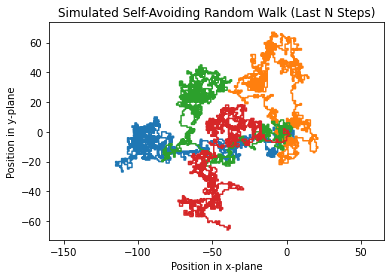

Time for all walks: 1.34 seconds
Average length of walk: 62.64


In [11]:
# import libraries
import timeit
import random
import numpy as np
from matplotlib import pyplot as plt
from collections import deque

def random_walk_1(walks, steps, last_n_steps = 3, plot_graphs = 1):
    
    """ Random walk 1 - Self-Avoiding"""
    # Start timer
    tik = timeit.default_timer()

    # Define list of possible steps (N, E, S, W) as (x, y) coordinate pairs
    direction = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    
    # Create empty list for storing the results of each walk
    all_walks = [[] for i in range(walks)]
    
    # Loop through required number of walks
    for j in range(walks):

        # Create zero result vector for (x, y) co-ordinates, by definition (x, y) default to 0 at step 0
        this_walk = [(0, 0)] * (steps + 1)
        
        # Initialise a queue to store last n steps, adding most recent to the left
        q = deque(maxlen = last_n_steps)
        q.appendleft(this_walk[0])
        
        # Loop through required steps in random walk checking that next step will not land at last n steps
        for i in range(1, steps + 1):

            # Assume move is invalid until proven valid
            valid = 0
            
            while valid == 0:
                # Generate next random step with randomly generated weights (randomised each step), returns (x, y)
                delta = random.choices(direction, weights=np.random.randint(1, size=(4))+1, k=1)[0]
                
                # Determine whether the new delta is a valid step and repeat step (invalid) or add to walk (valid)
                # The q is used to check the delta as the first element is always the most recent valid move
                # The cumulative position is finally added to the q and walk vectors once a valid step is obtained
                if (delta[0] + q[0][0], delta[1] + q[0][1]) in q:
                    valid = 0
                else:
                    q.appendleft((delta[0] + q[0][0], delta[1] + q[0][1]))
                    this_walk[i] = q[0]
                    valid = 1

        # Calculate distance walked (euclidean) by performing pythagoras on the final entry
        all_walks[j] = np.sqrt(this_walk[-1][0]**2 + this_walk[-1][1]**2)
        
        # Add walk to plot cache if required
        if plot_graphs == 1:
            plt.plot(*zip(*this_walk))

    # End timer & print time
    tok = timeit.default_timer()
    elapsed = tok-tik
    avg_walk = sum(all_walks)/len(all_walks)
    
    # Display final plot if required
    if plot_graphs == 1:
        plt.title("Simulated Self-Avoiding Random Walk (Last N Steps)")
        plt.xlabel("Position in x-plane")
        plt.ylabel("Position in y-plane")
        plt.axis("equal")
        plt.show()

    
    return elapsed, avg_walk


# Generate random walk (walks, steps, last_n_steps = 3, plot_graphs = 1)
elapsed, avg_walk = random_walk_1(4, 2500, 2)

print(f"Time for all walks: {round(elapsed, 2)} seconds")
print(f"Average length of walk: {round(avg_walk, 2)}")

This simulation of a self-avoiding random walk has turned out to be one of the better ones.  Each walk is elongated and a bit "stringy" in shape as a result of avoiding the previous 2 steps and as a result more ground is covered with multiple search clusters within each walk.  Sadly the walks are mainly confined to the central and western hemisphere of the search space. I did discover during testing that avoiding the last 2 steps appeared to produce the optimal results - 1 or no avoiding steps tended to allow more clustering of the walk where extended towards a maximum of 7 (for this laptop) tended to elongate the walks towards a linear walk which left large numbers of unexplored search space.<br><br>Running the simulations in question 3b with the plot_graphs parameter set to '1' (draw graphs) does reveal however that as the number of random walks increases the search space does get explored more evenly. The simulations are run with the plots turned off to assist the processing speed.<br><br>

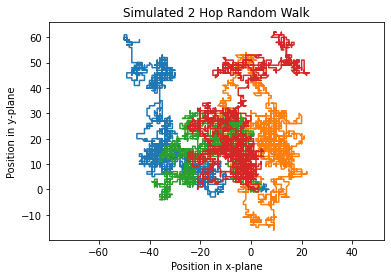

Time for all walks: 1.07 seconds
Average length of walk: 45.54


In [12]:
# import libraries
import timeit
import random
import numpy as np
from matplotlib import pyplot as plt
from itertools import accumulate

def random_walk_2(walks, steps, max_hop_prob = 0.5, plot_graphs = 1):
    
    """ Random walk 2 - Allow 2 hop step """
    # Start timer
    tik = timeit.default_timer()

    # Define list of all possible steps (N, E, S, W, NN, NE, EE, SE, SS, SW, WW, NW) as (x, y) coordinate pairs
    direction = [(0, 1), (1, 0), (0, -1), (-1, 0), (0, 2), (1, 1), (2, 0), (1, -1), (0, -2), (-1, -1), (-2, 0), (-1, 1)]

    # Create empty list for storing the results of each walk
    all_walks = [[] for w in range(walks)]
    
    # Loop through required number of walks
    for j in range(walks):

        # Generate a walk constant randomised probability for a 2 hop step
        # This is subject to a maximum user defined probability, zero is allowed to be randomly generated
        prob_2_hop = (np.random.randint(max_hop_prob*100, size=(1))+1)/100
     
        # Create zero result vector for (x, y) co-ordinates, by definition (x, y) default to 0 at step 0
        this_walk = [(0, 0)] * (steps + 1)

        # Loop through steps in random walk checking if a 2 hop step is allowed
        for i in range(1, steps+1):

            # If random number is less than or equal to prob_2_hop then 2 step hop occurs
            # Step weights are re-calculated as random chocies on each step to maximise randomness of walk
            if np.random.rand() <= prob_2_hop:
                this_walk[i] = random.choices(direction[4:], weights=np.random.randint(2, size=(8))+1, k=1)[0]
            else:
                this_walk[i] = random.choices(direction[:4], weights=np.random.randint(2, size=(4))+1, k=1)[0]

        # Convert walk to cumulative sum with List(zip(*map....))
        this_walk = list(zip(*map(accumulate, zip(*this_walk))))

        # Calculate distance walked (euclidean) by performing pythagoras on the final entry of the walk
        all_walks[j] = np.sqrt(this_walk[-1][0]**2 + this_walk[-1][1]**2)
        
        # Add walk to plot cache if required
        if plot_graphs == 1:
            plt.plot(*zip(*this_walk))

    # End timer & print time
    tok = timeit.default_timer()
    elapsed = tok-tik
    avg_walk = sum(all_walks)/len(all_walks)
    
    # Display final plot if required
    if plot_graphs == 1:
        plt.title("Simulated 2 Hop Random Walk")
        plt.xlabel("Position in x-plane")
        plt.ylabel("Position in y-plane")
        plt.axis("equal")
        plt.show()

    
    return elapsed, avg_walk


# Generate random walk (walks, steps, max_hop_prob = 0.5, plot_graphs = 1)
elapsed, avg_walk = random_walk_2(4, 2500, 0.25)

print(f"Time for all walks: {round(elapsed, 2)} seconds")
print(f"Average length of walk: {round(avg_walk, 2)}")

This simulation of two-hop random walk appears to be centred on the North and North West quadrant of the (0, 0) starting point. The walks are more bunched together than other simulations I have run with all bar the blue showing a thick density before wondering off to a slightly different space in the search area.  The addition of a two-hop step aids the random walk in spreading further. By adding a user defined variable that gave a maximum probability of any specific step being of the two-hop variety it enabled the walk to jump to new areas in a sequence of two-hop steps and then cluster and wander to explore the search space.  By increasing this probability towards one, or removing it, it would become possible for even more two-hop steps to occur within the walk, and this might well be preferable when the number of random walks is a larger number.

<br>

### Question 3b) Calculate the expected length of the walk after 2500 steps

Using the above functions the expected length E(L) can be calculated using simple pythagoras.  All walks start at (0, 0) and complete at (x, y) there the E(L) of any given walk can be given as: $E(L) = \sqrt (x^{2} + y^{2})$<br><br>
In order to get a good estimate a wide range of simulations will be performed, with the plot_graphs flag switched off (0)<br><br>The number of walks have been chosen to maximise simulation speed (sticking to $2^{x}$ or partial multiples seems to increase processing speed when compared to random numbers such as 100 or 500 as they are more natural numbers for assigning memory).<br><br>Simulation code is repeated for ease of marker to follow (i.e. not compacted into re-usable functions).

** RANDOM WALK 1 **
Beginning iterative analysis of number of walks needed to produce a stable Expected Length estimate:

Calculating iteration 1 of 15 ...
    Simulation completed in 0.42 seconds
Calculating iteration 2 of 15 ...
    Simulation completed in 0.67 seconds
Calculating iteration 3 of 15 ...
    Simulation completed in 1.28 seconds
Calculating iteration 4 of 15 ...
    Simulation completed in 2.68 seconds
Calculating iteration 5 of 15 ...
    Simulation completed in 5.54 seconds
Calculating iteration 6 of 15 ...
    Simulation completed in 11.35 seconds
Calculating iteration 7 of 15 ...
    Simulation completed in 21.17 seconds
Calculating iteration 8 of 15 ...
    Simulation completed in 31.11 seconds
Calculating iteration 9 of 15 ...
    Simulation completed in 44.01 seconds
Calculating iteration 10 of 15 ...
    Simulation completed in 58.62 seconds
Calculating iteration 11 of 15 ...
    Simulation completed in 77.06 seconds
Calculating iteration 12 of 15 ...
    Simula

,Iteration,Num Walks,Expected Length
0,[1],1,58.82
1,[2],2,48.10
2,[3],4,42.69
3,[4],8,55.32
4,[5],16,66.41
5,[6],32,60.78
6,[7],64,63.29
7,[8],96,66.06
8,[9],128,62.41
9,[10],192,64.89


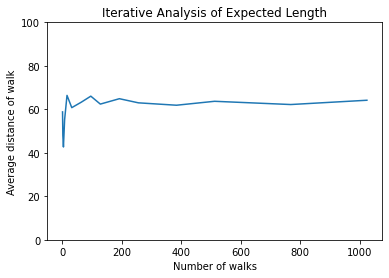

In [14]:
import pandas as pd

# Set up a vector n of random walks for each simulation iteration
n = [1, 2, 4, 8, 16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024]
sim_iteration = [0] * len(n)
sim_walks = [0] * len(n)
sim_dist = [0] * len(n)

print("** RANDOM WALK 1 **")
print("Beginning iterative analysis of number of walks needed to produce a stable Expected Length estimate:\n")
for i in range(len(n)):
    print(f"Calculating iteration {i+1} of {len(n)} ...")
    # Generate random walk (walks, steps, last_n_steps = 3, plot_graphs = 1)
    mctime, mcdist = random_walk_1(n[i], 2500, 2, 0)   # Set plot_graphs = 0 to suppress individual walk plots
    print(f"    Simulation completed in {round(mctime, 2)} seconds")
    sim_iteration[i], sim_walks[i], sim_dist[i] = [i+1], n[i], round(mcdist, 2)

# Create dictionary of results
results1 = {'Iteration':sim_iteration, 'Num Walks':sim_walks, 'Expected Length':sim_dist}

# Display table of simulation results
df = pd.DataFrame(results1, columns = ['Iteration', 'Num Walks', 'Expected Length'])
display(df)
print("\n")

# Display simple plot of results
plt.plot(sim_walks, sim_dist)
plt.title("Iterative Analysis of Expected Length")
plt.xlabel("Number of walks")
plt.ylabel("Average distance of walk")
plt.ylim(0, 100)
plt.show()

<br>From the simulations above; it can be seen that the number of walks needed to produce a stable estimate of the expected walk length (E(L)) appears to be around 200 walks and produces an Expected Length of approximately 62-64, which is a number that I have found to be consistent during testing. Other simulations have been more stable than this one, almost flatlining around the 200 walk mark.<br><br>If this were a project or commercial piece of work, the next step I would take would be to create a new vector of random walks and repeat the process to obtain a tighter estimate by analysing a number of walk iterations around the point where the estimate plateaus, unless this was deemed to be a sufficient level of accuracy.<br><br>

** RANDOM WALK 2 **
Beginning iterative analysis of number of walks needed to produce a stable Expected Length estimate:

Calculating iteration 1 of 15 ...
    Simulation completed in 0.29 seconds
Calculating iteration 2 of 15 ...
    Simulation completed in 0.56 seconds
Calculating iteration 3 of 15 ...
    Simulation completed in 1.42 seconds
Calculating iteration 4 of 15 ...
    Simulation completed in 2.37 seconds
Calculating iteration 5 of 15 ...
    Simulation completed in 4.62 seconds
Calculating iteration 6 of 15 ...
    Simulation completed in 10.57 seconds
Calculating iteration 7 of 15 ...
    Simulation completed in 18.21 seconds
Calculating iteration 8 of 15 ...
    Simulation completed in 27.33 seconds
Calculating iteration 9 of 15 ...
    Simulation completed in 33.28 seconds
Calculating iteration 10 of 15 ...
    Simulation completed in 48.73 seconds
Calculating iteration 11 of 15 ...
    Simulation completed in 70.01 seconds
Calculating iteration 12 of 15 ...
    Simula

,Iteration,Num Walks,Expected Length
0,[1],1,115.76
1,[2],2,64.11
2,[3],4,36.51
3,[4],8,47.16
4,[5],16,55.98
5,[6],32,56.01
6,[7],64,47.95
7,[8],96,46.15
8,[9],128,53.70
9,[10],192,50.43


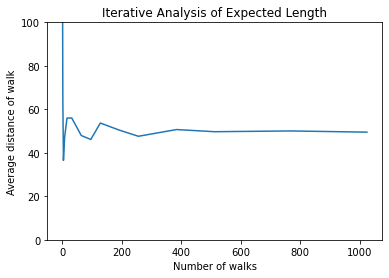

In [15]:
import pandas as pd

# Set up a vector n of random walks for each simulation iteration
n = [1, 2, 4, 8, 16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024]
sim_iteration = [0] * len(n)
sim_walks = [0] * len(n)
sim_dist = [0] * len(n)

print("** RANDOM WALK 2 **")
print("Beginning iterative analysis of number of walks needed to produce a stable Expected Length estimate:\n")
for i in range(len(n)):
    print(f"Calculating iteration {i+1} of {len(n)} ...")
    # Generate random walk (walks, steps, max_hop_prob = 0.5, plot_graphs = 1)
    mctime, mcdist = random_walk_2(n[i], 2500, 0.25, 0)   # Set plot_graphs = 0 to suppress individual walk plots
    print(f"    Simulation completed in {round(mctime, 2)} seconds")
    sim_iteration[i], sim_walks[i], sim_dist[i] = [i+1], n[i], round(mcdist, 2)

# Create dictionary of results
results2 = {'Iteration':sim_iteration, 'Num Walks':sim_walks, 'Expected Length':sim_dist}

# Display table of simulation results
df = pd.DataFrame(results2, columns = ['Iteration', 'Num Walks', 'Expected Length'])
display(df)
print("\n")

# Display simple plot of results
plt.plot(sim_walks, sim_dist)
plt.title("Iterative Analysis of Expected Length")
plt.xlabel("Number of walks")
plt.ylabel("Average distance of walk")
plt.ylim(0, 100)
plt.show()

<br>From the simulations above; it can be seen that the number of walks needed to produce a stable estimate of the expected walk length (E(L)) appears to be around 400 walks and produces an Expected Length of approximately 50, if not for the dip to 47.6 for the 256 walk simulation this would likely have almost balanced out at around 200 walks as I saw during testing.<br><br>If this were a project or commercial piece of work, the next step I would take would be to create a new vector of random walks and repeat the process to obtain a tighter estimate by analysing a number of walk iterations around the point where the estimate plateaus, unless this was deemed to be a sufficient level of accuracy.<br><br>

<br>

### Question 4 ) Generalised Random Walk in Continuous Time

This question requires the applicatin of Ito's Lemma. This is a type of Markov Chain known as Brownian Motion and is considered to be a classic case (i.e. without drift). The process is also known as a Weiner Process as characterised by the dw variable in the given equation, which is normally distribution with mean 0 and standard deviation 1. The formula given for this question is: $dS = a(x,t)dt + b(x,t)dw$<br>In our case, we will replace $dS$ with $dX$ as we are only looking to simulate the walk in one dimensional space.<br><br>The walk will measure increases in the X variable (dx) over very small changes in time (dt) and will be identified as a Weiner process through dw which is defined as $\epsilon \sqrt(dt)$ where $\epsilon$ is a randomly distributed number with mean 0 and standard deviation 1.

In order to test that the code was set up properly two tests were carried out:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;Function b(x,t) was set to zero and dt set to a constant which should return pure cosine wave given function a(x,t) is defined as cos(3t)<br>
&nbsp;&nbsp;&nbsp;&nbsp;Function a(x,t) was set to zero, b(x,t) to one, and dw was plotted against time to confirm it oscillates around zero<br><br>The following plots show that the code appears to be set up correctly through the display of a perfect cosine curve, and a weiner process that oscillates around zero:

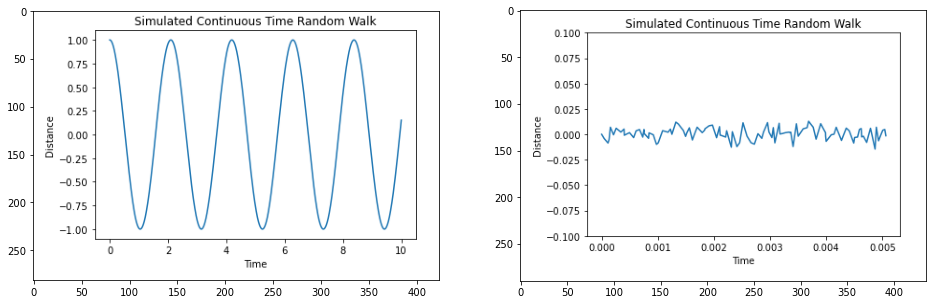

In [58]:
img1=mpllimg.imread('a_func_test.png')
img2=mpllimg.imread('b_func_test.png')
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax1 = fig.add_subplot(1,2,2)
ax1.imshow(img2)

For running the simulation, the function a(x, t) was changed to return 10x + cos(3t) in order to include x and make it more interesting.  The function b(x, t) however simply takes the square root of the elapsed time.

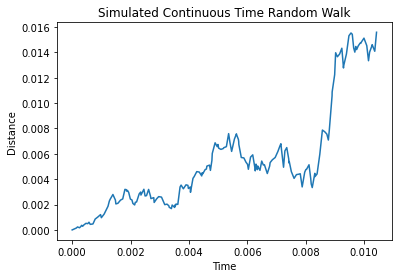

Time for all walks: 0.06 seconds
Average length of walk: 0.0156


In [25]:
import math as m

def a(x,t):
    return 10*x + m.cos(3 * t)

def b(x,t):
    return np.sqrt(t)

def continuous_time_random_walk(walks, steps, plot_graphs = 1):
    """ Continuous Time Random Walk """
    
    # Start timer
    tik = timeit.default_timer()

    # Create empty list for storing the results of each walk
    all_walks = [[] for w in range(walks)]
 
    # Loop through required number of walks
    for j in range(walks):

        # Define results vector for length of walk with (x, t) = 0 by default
        x = np.zeros(steps+1)
        t = np.zeros(steps+1)
        
        for i in range(1, steps+1):

            # Set dt, epsilon and dw
            dt = np.random.random(1) * (10**-4)           # Change in time
            epsilon = np.random.normal(0, 1)              # Normally distributed N(0,1)
            dw = epsilon * np.sqrt(dt)                    # Weiner process
            
            # Calculate change in x using x and t from previous step (i-1)
            dx = a(x[i-1],t[i-1])*dt + b(x[i-1],t[i-1])*dw

            # Update x and t
            x[i] = x[i-1] + dx
            t[i] = t[i-1] + dt
            
           
        # Distance of walk
        all_walks[j] = abs(x[-1]) - x[0]

        # Add walk to plot cache if required
        if plot_graphs == 1:
            plt.plot(t, x)

    
    # End timer & print time
    tok = timeit.default_timer()
    elapsed = tok-tik
    avg_walk = sum(all_walks)/len(all_walks)

    # Display final plot if required
    if plot_graphs == 1:
        plt.title("Simulated Continuous Time Random Walk")
        plt.xlabel("Time")
        plt.ylabel("Distance")
        plt.show()
        
    return elapsed, avg_walk


# Call one walk - continuous_time_walk(walks, steps, plot_graphs=1)
elapsed, avg_walk = continuous_time_random_walk(1, 200, 1)

print(f"Time for all walks: {round(elapsed, 2)} seconds")
print(f"Average length of walk: {round(avg_walk, 4)}")

The simulation of 1 walk above has produced an interesting shape with peaks and troughs as you would expect from a cosine function. The stochastic spikes and troughs along the line are as one would expect from the inclusion of the weiner process dw, noticeably with large steps towards the end of the walk. Having a variable time interval dt also affects the shape of the walk as not all steps are equally spaced. This particular walk produced a longer length due to the unexpected large steps upward close just before the walk finishes. A longer walk would give a more interesting shape.<br><br>**Note:** The time for all walks is based on also plotting the graph, hence why it is different from the time listed on the graph. It is included more as a performance metric than a representation of the time variable.

Beginning iterative analysis of number of walks needed to produce a stable Expected Length estimate:

Calculating iteration 1 of 15 ...
    Simulation completed in 0.02 seconds
Calculating iteration 2 of 15 ...
    Simulation completed in 0.05 seconds
Calculating iteration 3 of 15 ...
    Simulation completed in 0.09 seconds
Calculating iteration 4 of 15 ...
    Simulation completed in 0.16 seconds
Calculating iteration 5 of 15 ...
    Simulation completed in 0.31 seconds
Calculating iteration 6 of 15 ...
    Simulation completed in 0.62 seconds
Calculating iteration 7 of 15 ...
    Simulation completed in 1.38 seconds
Calculating iteration 8 of 15 ...
    Simulation completed in 1.85 seconds
Calculating iteration 9 of 15 ...
    Simulation completed in 2.89 seconds
Calculating iteration 10 of 15 ...
    Simulation completed in 3.75 seconds
Calculating iteration 11 of 15 ...
    Simulation completed in 5.4 seconds
Calculating iteration 12 of 15 ...
    Simulation completed in 8.1 secon

,Iteration,Num Walks,Expected Length
0,[1],1,0.0066
1,[2],2,0.0014
2,[3],4,0.0169
3,[4],8,0.0109
4,[5],16,0.0098
5,[6],32,0.0101
6,[7],64,0.0108
7,[8],96,0.0117
8,[9],128,0.0106
9,[10],192,0.0106


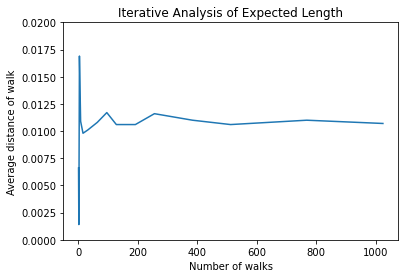

In [28]:
import pandas as pd

# Set up a vector n of random walks for each simulation iteration
n = [1, 2, 4, 8, 16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024]
sim_iteration = [0] * len(n)
sim_walks = [0] * len(n)
sim_dist = [0] * len(n)

print("Beginning iterative analysis of number of walks needed to produce a stable Expected Length estimate:\n")
for i in range(len(n)):
    print(f"Calculating iteration {i+1} of {len(n)} ...")
    # Call one walk - continuous_time_walk(walks, steps, plot_graphs=1)
    mctime, mcdist = continuous_time_random_walk(n[i], 200, 0)   # Set plot_graphs = 0 to suppress individual walk plots
    print(f"    Simulation completed in {round(mctime, 2)} seconds")
    sim_iteration[i], sim_walks[i], sim_dist[i] = [i+1], n[i], round(mcdist, 4)

# Create dictionary of results
results3 = {'Iteration':sim_iteration, 'Num Walks':sim_walks, 'Expected Length':sim_dist}

# Display table of simulation results
df = pd.DataFrame(results3, columns = ['Iteration', 'Num Walks', 'Expected Length'])
display(df)
print("\n")

# Display simple plot of results
plt.plot(sim_walks, sim_dist)
plt.xlabel("Number of walks")
plt.ylabel("Average distance of walk")
plt.ylim(0, 0.02)
plt.title("Iterative Analysis of Expected Length")
plt.show()

<br>From the simulations above; it can be seen that the number of walks needed to produce a stable estimate of the expected walk length (E(L)) appears to begin around 200-300 walks and produces an Expected Length of approximately 0.0105-0.0110. On previous simulations before I updated a(x,t) to include the x variable it appeared to stabilise around the 200 walk mark. With repeated simulations (due to quick run time) it seems to be hitting the 200-300 average for stabilisation clearly highlighting to me the impact of adding the x variable to a(x,t) causing the walk to take slightly longer to produce a stable estimate.<br><br>If this were a project or commercial piece of work, the next step I would take would be to create a new vector of random walks and repeat the process to obtain a tighter estimate by analysing a number of walk iterations around the point where the estimate plateaus, unless this was deemed to be a sufficient level of accuracy.<br><br>